#data collection

In [94]:
%matplotlib inline
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
flight_data = pd.read_csv('2018.csv')

# Checking first 2 instances and last 2 instances
pd.concat([flight_data.head(2), flight_data.tail(2)])

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from the flight dataset.")

There are 7213446 rows and 28 columns from the flight dataset.


In [97]:
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d')

In [98]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

#Data Preprocessing

In [99]:
def checkMissing(data,perc=0):
    missing_values = [(i, data[i].isna().mean()*100) for i in data]
    missing_values = pd.DataFrame(missing_values, columns=["column_name", "percentage"])
    missing_values = missing_values[missing_values.percentage > perc]
    print(missing_values.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.383796
2   LATE_AIRCRAFT_DELAY   81.247382
3         CARRIER_DELAY   81.247382
4         WEATHER_DELAY   81.247382
5             NAS_DELAY   81.247382
6        SECURITY_DELAY   81.247382
7             ARR_DELAY    1.899785
8   ACTUAL_ELAPSED_TIME    1.863769
9              AIR_TIME    1.863769
10            WHEELS_ON    1.653107
11              TAXI_IN    1.653107
12             ARR_TIME    1.653093
13            DEP_DELAY    1.625215
14             TAXI_OUT    1.605751
15           WHEELS_OFF    1.605737
16             DEP_TIME    1.557051
17     CRS_ELAPSED_TIME    0.000139


In [100]:
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

In [101]:
def format_data(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        res = datetime.time(int(x[0:2]), int(x[2:4]))
        return res

In [102]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_data)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_data)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_data)
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_data)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_data)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_data)

In [103]:
def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str))
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [104]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7051259 entries, 0 to 7213445
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  float

In [105]:
flight_data.drop(['Unnamed: 27',
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

In [106]:
flight_data.isna().sum()

,0
FL_DATE,0
OP_CARRIER,0
ORIGIN,0
DEST,0
DEP_DELAY,4735
TAXI_OUT,0
TAXI_IN,0
ARR_DELAY,17560
DIVERTED,0
CRS_ELAPSED_TIME,7


In [107]:
flight_data = flight_data.dropna()
flight_data.isna().sum()

,0
FL_DATE,0
OP_CARRIER,0
ORIGIN,0
DEST,0
DEP_DELAY,0
TAXI_OUT,0
TAXI_IN,0
ARR_DELAY,0
DIVERTED,0
CRS_ELAPSED_TIME,0


In [108]:
flight_data.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [109]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [110]:
flight_data.OP_CARRIER.nunique()

18

In [111]:
flight_data.OP_CARRIER.value_counts()

,count
OP_CARRIER,
Southwest Airlines,1326376
Delta Airlines,938464
American Airlines,892021
SkyWest Airlines,758717
United Airlines,609226
Republic Airways,303927
JetBlue Airways,293075
Envoy Air,283788
PSA Airlines,264929


In [112]:
flight_data.DEST.value_counts().iloc[:20]

,count
DEST,
ATL,384813
ORD,322119
DFW,271096
DEN,232583
CLT,225450
LAX,217452
SFO,171824
PHX,171433
IAH,170255


In [113]:
top_cities = flight_data.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,384813


In [114]:
top_cities.DEST.unique()
city_list = top_cities['DEST'].tolist()

In [115]:
boolean_check_dest =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_check_dest]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0
349,2018-01-01,United Airlines,EWR,ATL,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0
517,2018-01-01,United Airlines,IAH,ATL,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0
686,2018-01-01,United Airlines,EWR,ATL,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0


In [116]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384813 entries, 13 to 7213438
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              384813 non-null  datetime64[ns]
 1   OP_CARRIER           384813 non-null  object        
 2   ORIGIN               384813 non-null  object        
 3   DEST                 384813 non-null  object        
 4   DEP_DELAY            384813 non-null  float64       
 5   TAXI_OUT             384813 non-null  float64       
 6   TAXI_IN              384813 non-null  float64       
 7   ARR_DELAY            384813 non-null  float64       
 8   DIVERTED             384813 non-null  float64       
 9   CRS_ELAPSED_TIME     384813 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  384813 non-null  float64       
 11  AIR_TIME             384813 non-null  float64       
 12  DISTANCE             384813 non-null  float64       
 13  CARRIER_DELAY    

In [117]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])
flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1)
    else:
        daytype.append(0)
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1


In [118]:
airports_data = pd.read_csv('airports.csv')
airports_data.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [119]:
airport_IATA_CODE = list(airports_data['IATA_CODE'])

In [120]:
flight_data.ORIGIN.unique()

array(['EWR', 'IAH', 'SFO', 'ORD', 'SEA', 'FSD', 'DSM', 'ILM', 'JAN',
       'OAJ', 'TLH', 'CHS', 'CID', 'BMI', 'ABY', 'DHN', 'MDT', 'FSM',
       'HSV', 'TYS', 'BQK', 'CHA', 'GSP', 'AGS', 'MOB', 'MGM', 'TRI',
       'GSO', 'AVL', 'CSG', 'VLD', 'PIA', 'LFT', 'GNV', 'FAY', 'BTV',
       'AEX', 'FAR', 'EWN', 'CAE', 'BOS', 'MYR', 'BTR', 'TUL', 'ECP',
       'LEX', 'ELM', 'VPS', 'PHF', 'RST', 'CRW', 'SDF', 'XNA', 'LNK',
       'HPN', 'BHM', 'GRK', 'EYW', 'SGF', 'GPT', 'ABE', 'MLI', 'EVV',
       'DEN', 'MCO', 'AUS', 'MIA', 'LGA', 'SLC', 'BWI', 'DTW', 'FLL',
       'LAS', 'PHL', 'DFW', 'CLE', 'LAX', 'MSY', 'MSP', 'TPA', 'CLT',
       'FWA', 'SHV', 'ASE', 'SBN', 'MLU', 'GTR', 'ROA', 'CMH', 'DAL',
       'DCA', 'HOU', 'IAD', 'IND', 'JAX', 'MCI', 'MDW', 'MKE', 'OAK',
       'PBI', 'PHX', 'PIT', 'RDU', 'RIC', 'RSW', 'SAN', 'SAT', 'STL',
       'JFK', 'STT', 'DAB', 'SJU', 'OMA', 'CAK', 'STX', 'PDX', 'BDL',
       'HNL', 'ELP', 'CVG', 'GRR', 'FNT', 'MEM', 'SJC', 'BNA', 'ORF',
       'OKC', 'BUF',

In [121]:
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 167
Destination: 1


In [122]:
Origin_code = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(Origin_code)
print()
print("There are "+str(len(Origin_code)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


In [123]:
dest_code = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(dest_code)
print()
print("There are "+str(len(dest_code)))

IATA Code (Destination) that is not found from airport data:
[]

There are 0


In [124]:
airports_dict = pd.Series(airports_data.AIRPORT.values, index=airports_data.IATA_CODE).to_dict()
print(type(airports_dict))

<class 'dict'>


In [125]:
flight_data['ORIGIN'].replace(airports_dict, inplace=True)
flight_data['DEST'].replace(airports_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1
349,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0,1,1,Jan,0,Monday,1
517,2018-01-01,United Airlines,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0,1,1,Jan,0,Monday,1
686,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0,1,1,Jan,0,Monday,1


In [126]:
flight_status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        flight_status.append(0)
    else:
        flight_status.append(1)
flight_data['FLIGHT_STATUS'] = flight_status

EDA

In [127]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

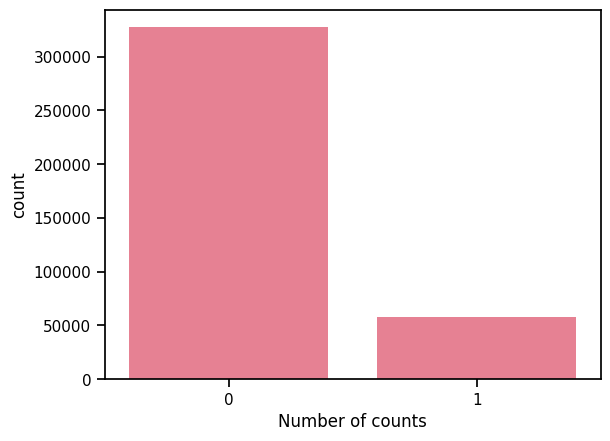

In [128]:
plot=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
plot.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

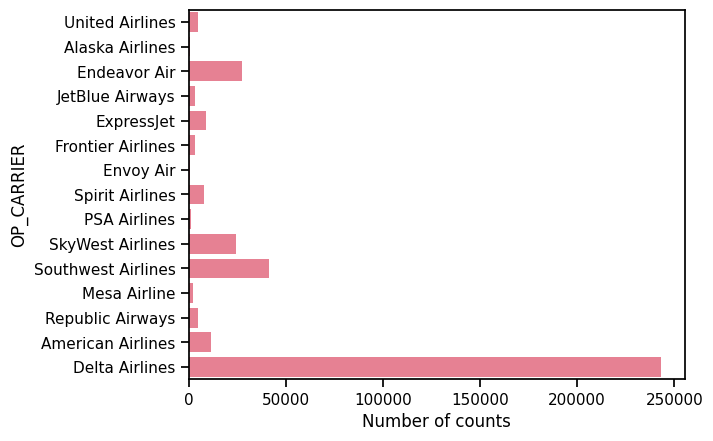

In [129]:
plot=sns.countplot(y="OP_CARRIER",data=flight_category)
plot.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

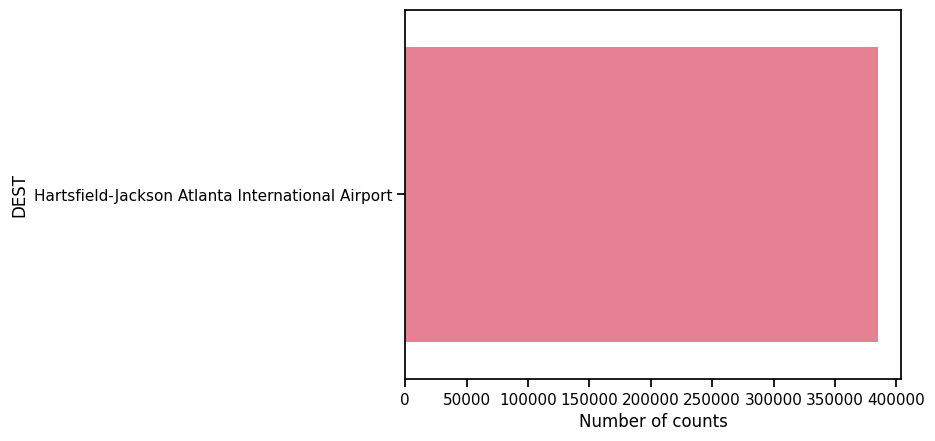

In [130]:
sns.set_context("notebook")
plot=sns.countplot(y="DEST",data=flight_category)
plot.set(xlabel="Number of counts")

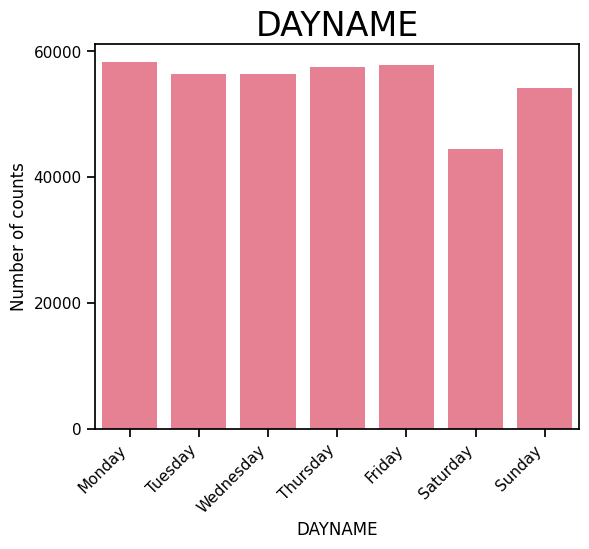

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out specific columns to plot, excluding "MONTH_AB" explicitly
category = [i for i in flight_category if i not in ["ORIGIN", "DEST", "OP_CARRIER", "FLIGHT_STATUS", "MONTH", "MONTH_AB"]]

# Set up the figure with a grid of subplots
num_features = len(category)
ncols = 2
nrows = (num_features + ncols - 1) // ncols  # Calculate rows needed for 2 columns

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

sns.set_palette("husl")
sns.set_context("poster")

# Flatten axes array to iterate easily
axes = axes.flatten()

for i, feature in enumerate(category):
    ax = axes[i]
    sns.countplot(x=feature, data=flight_category, ax=ax)
    ax.set_ylabel("Number of counts")
    ax.set_title(feature)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Remove any unused axes
for j in range(len(category), len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [132]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [133]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [134]:
flight_data_new.drop(['FL_DATE',
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [135]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384813 entries, 13 to 7213438
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   DIVERTED                       384813 non-null  float64
 4   CRS_ELAPSED_TIME               384813 non-null  float64
 5   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 6   AIR_TIME                       384813 non-null  float64
 7   DISTANCE                       384813 non-null  float64
 8   WHEELS_OFF_elapse              384813 non-null  float64
 9   WHEELS_ON_elapse               384813 non-null  float64
 10  FLIGHT_STATUS                  384813 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     384813 non-null  bool   
 12  OP_CARRIER_American Airlines   38

In [136]:
!pip install feature_engine

In [137]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.25,
    random_state=100)

X_train.shape, X_test.shape

((288609, 44), (96204, 44))

In [139]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [140]:
len(sel.features_to_drop_)

1

In [141]:
sel.features_to_drop_

['DIVERTED']

In [142]:
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [143]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((288609, 43), (96204, 43))

In [144]:
corr_mat = X_train.corr()
corr_mat = corr_mat.abs().unstack()
corr_mat = corr_mat.sort_values(ascending=False)
corr_mat = corr_mat[corr_mat >= 0.8]
corr_mat = corr_mat[corr_mat < 1]
corr_mat = pd.DataFrame(corr_mat).reset_index()
corr_mat.columns = ['feature1', 'feature2', 'corr']

In [145]:
corr_mat

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983998
1,CRS_ELAPSED_TIME,AIR_TIME,0.983998
2,DISTANCE,AIR_TIME,0.982972
3,AIR_TIME,DISTANCE,0.982972
4,DISTANCE,CRS_ELAPSED_TIME,0.981438
5,CRS_ELAPSED_TIME,DISTANCE,0.981438
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978477
7,ACTUAL_ELAPSED_TIME,AIR_TIME,0.978477
8,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.968028
9,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.968028


In [146]:
corr_mat.feature1.unique()

array(['AIR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'ACTUAL_ELAPSED_TIME'],
      dtype=object)

In [147]:
grouped_feature_ls = []
correlated_groups = []

for feature in corr_mat.feature1.unique():

    if feature not in grouped_feature_ls:
        correlated_block = corr_mat[corr_mat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 43 total features


In [148]:
for group in correlated_groups:
    print(group)
    print()

   feature1             feature2      corr
0  AIR_TIME     CRS_ELAPSED_TIME  0.983998
3  AIR_TIME             DISTANCE  0.982972
6  AIR_TIME  ACTUAL_ELAPSED_TIME  0.978477



In [149]:
group = correlated_groups[0]
group

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983998
3,AIR_TIME,DISTANCE,0.982972
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978477


In [150]:
from sklearn.ensemble import RandomForestClassifier
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [151]:
importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ACTUAL_ELAPSED_TIME,0.502578
3,CRS_ELAPSED_TIME,0.246256
0,CRS_ELAPSED_TIME,0.156903
1,DISTANCE,0.094263


In [152]:
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [153]:
corr_mat = X_train.corr()
corr_mat = corr_mat.abs().unstack()
corr_mat = corr_mat.sort_values(ascending=False)
corr_mat = corr_mat[corr_mat <= -0.8]
corr_mat = corr_mat[corr_mat > -1]
corr_mat = pd.DataFrame(corr_mat).reset_index()
corr_mat.columns = ['feature1', 'feature2', 'corr']

In [154]:
grouped_feature_ls = []
correlated_groups = []
for feature in corr_mat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corr_mat[corr_mat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]
        correlated_groups.append(correlated_block)
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 43 total features


In [155]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.25,
    random_state=100)

X_train.shape, X_test.shape

((288609, 41), (96204, 41))

In [156]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.71747377e-01, 1.43078297e-01, 2.65832165e-02, 2.26953123e-02,
       1.57224396e-02, 1.64326828e-01, 3.41609818e-02, 1.25502144e-05,
       2.49100335e-04, 9.07634387e-03, 3.07907710e-04, 5.25082441e-06,
       3.50888948e-05, 7.64430380e-04, 3.56512218e-04, 1.06139520e-05,
       4.42739558e-05, 1.24468662e-04, 1.79931201e-03, 7.41044306e-04,
       9.20104654e-05, 4.43660916e-05, 9.18431731e-05, 2.42056131e-05,
       2.13943783e-04, 2.23361159e-04, 2.47074546e-04, 1.27206313e-04,
       2.13591874e-03, 2.56883834e-04, 6.88833057e-05, 2.30826195e-03,
       1.09648657e-03, 1.01059905e-04, 2.02686414e-04, 1.51035649e-04,
       4.12357311e-04, 3.46575792e-05, 1.23885051e-04, 7.45662953e-05,
       1.27956749e-04])

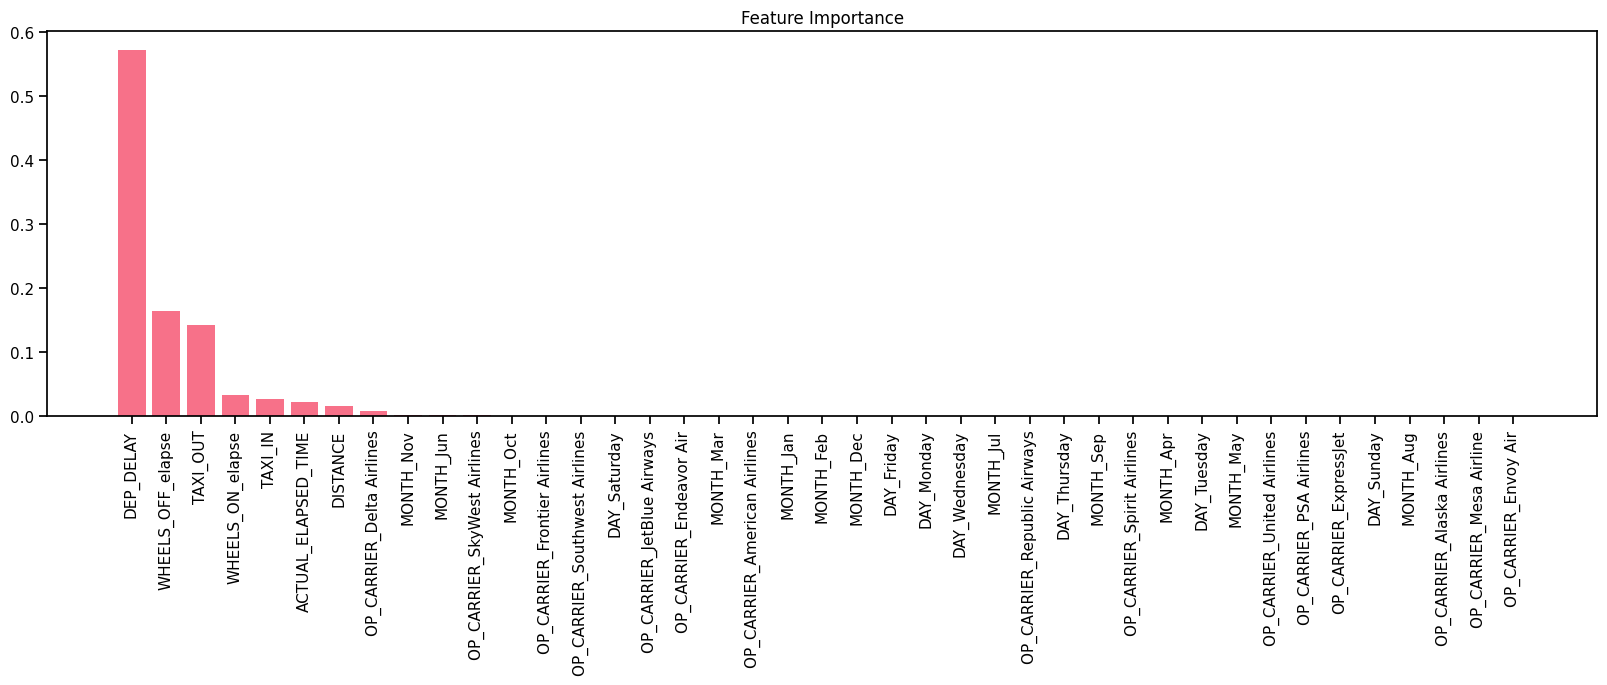

In [157]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
names = [X_train.columns[i] for i in indices]
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [158]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.571747
1,WHEELS_OFF_elapse,0.164327
2,TAXI_OUT,0.143078
3,WHEELS_ON_elapse,0.034161
4,TAXI_IN,0.026583
5,ACTUAL_ELAPSED_TIME,0.022695
6,DISTANCE,0.015722
7,OP_CARRIER_Delta Airlines,0.009076
8,MONTH_Nov,0.002308
9,MONTH_Jun,0.002136


In [159]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [160]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 4   DISTANCE                       384813 non-null  float64
 5   WHEELS_OFF_elapse              384813 non-null  float64
 6   WHEELS_ON_elapse               384813 non-null  float64
 7   FLIGHT_STATUS                  384813 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     384813 non-null  bool   
 9   OP_CARRIER_American Airlines   384813 non-null  bool   
 10  OP_CARRIER_Delta Airlines      384813 non-null  bool   
 11  OP_CARRIER_Endeavor Air        384813 non-null  bool   
 12  OP_CARRIER_Envoy Air           38

In [161]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DEP_DELAY                      384813 non-null  float64 
 1   TAXI_OUT                       384813 non-null  float64 
 2   TAXI_IN                        384813 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64 
 4   DISTANCE                       384813 non-null  float64 
 5   WHEELS_OFF_elapse              384813 non-null  float64 
 6   WHEELS_ON_elapse               384813 non-null  float64 
 7   FLIGHT_STATUS                  384813 non-null  category
 8   OP_CARRIER_Alaska Airlines     384813 non-null  bool    
 9   OP_CARRIER_American Airlines   384813 non-null  bool    
 10  OP_CARRIER_Delta Airlines      384813 non-null  bool    
 11  OP_CARRIER_Endeavor Air        384813 non-null  bool    
 12  OP_CARRIER_Envoy Ai

In [162]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

split data into 75:25 for training and testing

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 41), (76963, 41))

In [164]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [165]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 0.967824946807227

Accuracy Random Forest test: 0.8826449072931148

Precision Random Forest test: 0.9463941380640185

Recall Random Forest test: 0.2162686172556623

F-measure Random Forest test: 0.35208034433285507

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65616
           1       0.95      0.22      0.35     11347

    accuracy                           0.88     76963
   macro avg       0.91      0.61      0.64     76963
weighted avg       0.89      0.88      0.85     76963



In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
def run_DecisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=100)
    dt = dt.fit(X_train,y_train)

    print('Test set')
    pred = dt.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, dt.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, dt.predict(X_test)))

In [168]:
run_DecisionTree(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     65616
           1       0.85      0.85      0.85     11347

    accuracy                           0.96     76963
   macro avg       0.91      0.91      0.91     76963
weighted avg       0.96      0.96      0.96     76963



In [169]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks
)

In [170]:
def run_all(X_train, X_test, y_train, y_test):

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=100)
    dt.fit(X_train,y_train)

    print('Test set')
    pred = dt.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, dt.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, dt.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, dt.predict(X_test)))

    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Random Forest')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

    print()
    print()
    print('Precision Recall Curve')
    ax = plt.gca()
    PrecisionRecallDisplay.from_estimator(dt, X_test, y_test, ax=ax, alpha=0.8)
    PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax, alpha=0.8)
    plt.show()



Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     65616
           1       0.85      0.85      0.85     11347

    accuracy                           0.96     76963
   macro avg       0.91      0.91      0.91     76963
weighted avg       0.96      0.96      0.96     76963

Random Forest
Roc-auc Random Forests roc-auc: 0.967824946807227

Accuracy Random Forest test: 0.8826449072931148

Precision Random Forest test: 0.9463941380640185

Recall Random Forest test: 0.2162686172556623

F-measure Random Forest test: 0.35208034433285507

Summary Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65616
           1       0.95      0.22  

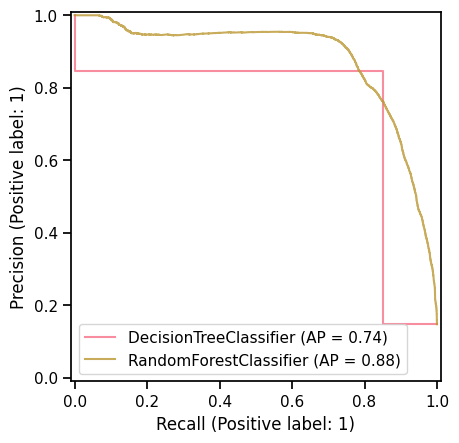

In [171]:
run_all(X_train, X_test, y_train, y_test)

In [172]:
import pickle
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt = dt.fit(X_train, y_train)

filename = 'decision_tree_model.pkl'
pickle.dump(dt, open(filename, 'wb'))

In [173]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)

filename = 'random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [174]:
print(flight_data_new.columns)

Index(['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ACTUAL_ELAPSED_TIME', 'DISTANCE',
       'WHEELS_OFF_elapse', 'WHEELS_ON_elapse', 'FLIGHT_STATUS',
       'OP_CARRIER_Alaska Airlines', 'OP_CARRIER_American Airlines',
       'OP_CARRIER_Delta Airlines', 'OP_CARRIER_Endeavor Air',
       'OP_CARRIER_Envoy Air', 'OP_CARRIER_ExpressJet',
       'OP_CARRIER_Frontier Airlines', 'OP_CARRIER_JetBlue Airways',
       'OP_CARRIER_Mesa Airline', 'OP_CARRIER_PSA Airlines',
       'OP_CARRIER_Republic Airways', 'OP_CARRIER_SkyWest Airlines',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Spirit Airlines',
       'OP_CARRIER_United Airlines', 'MONTH_Apr', 'MONTH_Aug', 'MONTH_Dec',
       'MONTH_Feb', 'MONTH_Jan', 'MONTH_Jul', 'MONTH_Jun', 'MONTH_Mar',
       'MONTH_May', 'MONTH_Nov', 'MONTH_Oct', 'MONTH_Sep', 'DAY_Friday',
       'DAY_Monday', 'DAY_Saturday', 'DAY_Sunday', 'DAY_Thursday',
       'DAY_Tuesday', 'DAY_Wednesday'],
      dtype='object')
